<a href="https://colab.research.google.com/github/Piyush9323/Data-Analysis-and-visualization/blob/main/Data_analysis_and_visualization_Temperature_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR : PIYUSH SHARMA**

#Data visualization and analysis of temperature dataset

1. Compute the normalized histogram of Tmin and Tmax for the above data. Compute and
plot cumulative distribution function (cdf) from the histograms.
2. Calculate Pearson correlation coefficient (r) between Tmax and Tmin .
3. Interpret the r2
value you got.
4. Plot the scatter plot from of Tmax → Tmin.
5. Now plot the smoothed scatter plot without sorting and observe the plot.
6. Plot smoothed scatter plot with sorting and observe the difference with the plot of above.
State how smoothed scatter plot is in some ways better than usual scatter plot.

Importing libraries and datset

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st

data = pd.read_csv('https://raw.githubusercontent.com/Piyush9323/Data-Analysis-and-visualization/main/Adelaide%20Temperature.csv')
TMAX = data['TMAX']
TMIN = data['TMIN']
data.head(5)
#print(len(TMAX))
#print(len(TMIN))

,STATION,STATION_NAME,DATE,TMAX,TMIN
0,GHCND:ASN00023013,PARAFIELD AIRPORT AS,20140101,339,239
1,GHCND:ASN00023013,PARAFIELD AIRPORT AS,20140102,228,167
2,GHCND:ASN00023013,PARAFIELD AIRPORT AS,20140103,245,154
3,GHCND:ASN00023013,PARAFIELD AIRPORT AS,20140104,239,144
4,GHCND:ASN00023013,PARAFIELD AIRPORT AS,20140105,232,142


**Detecting unit of temperature :**

Mostly temperature datapoints are ranging from 100 to 400 except the outliners.
So we can conclude that the temperature unit is:   **KELVIN**

** DATA CLEANING :**  Detecting and Discarding the inconsistencies in the data.



**DETECTION :**  In kelvin scale , the negative values of temperature are not practicle. these observations are inconsistent with the dataset.

**DISCARDING :** I am discarding them by setting their values to 0.

In [4]:
# This function detects negative temp. observations and # set them to 0.
def discard_error(A,B):
  for i in range(len(A)) :
    if A[i]<0 :
      B.append((i,A[i]))
      A[i] = 0        

C = []
D = []
discard_error(TMAX,C)   
discard_error(TMIN,D)
#print(f"The following are detected faulty observations in the provided TMAX data.\n",C)
#print(f"The following are detected faulty observations in the provided TMIN data.\n",D)
print(f"There are {len(C)} inconsistent data points in the TMAX data.")
print(f"There are {len(D)} inconsistent data points in the TMIN data.")

There are 30 inconsistent data points in the TMAX data.
There are 46 inconsistent data points in the TMIN data.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Finding the limits of observations in TMAX and TMIN.
print(max(TMAX), max(TMIN), min(TMAX), min(TMIN))

464 315 0 0


PLOTTING THE NORMALIZED HISTOGRAMS FOR TMAX AND TMIN.

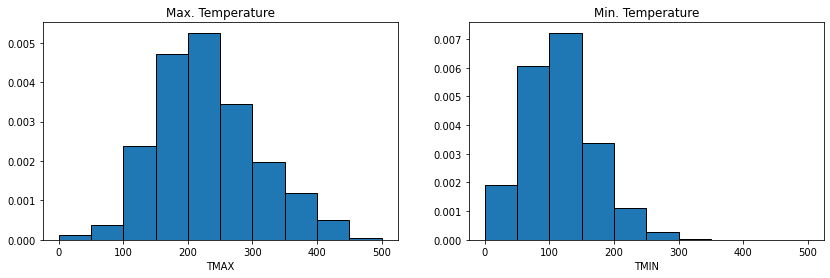

In [6]:
bins = [0,50,100,150,200,250,300,350,400,450,500]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,4))

counts_1, bins_1, _ = ax1.hist(TMAX, bins = bins,
   density = True, edgecolor = 'black') 
ax1.set_xlabel('TMAX')
ax1.set_title('Max. Temperature')

counts_2, bins_2, _ = ax2.hist(TMIN, bins = bins, 
   density = True, edgecolor = 'black')
ax2.set_xlabel('TMIN')
ax2.set_title('Min. Temperature')
plt.show()

**PLOTTING THE PDF AND CDF FROM THE HISTROGRAMS.**

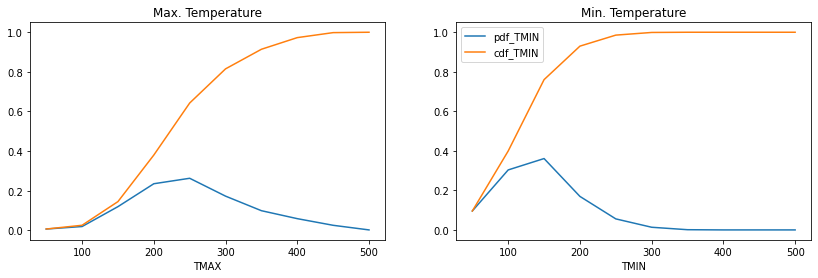

In [7]:
pdf_TMAX = counts_1/(sum(counts_1))
pdf_TMIN = counts_2/(sum(counts_2))
#print(pdf_TMAX)
#print(bins_1)
#compute cdf
cdf_TMAX = np.cumsum(pdf_TMAX)
cdf_TMIN = np.cumsum(pdf_TMIN)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,4))
ax1.plot(bins_1[1:],pdf_TMAX, label = 'pdf_TMAX')
ax1.plot(bins_1[1:],cdf_TMAX, label = 'cdf_TMAX')
ax1.set_xlabel('TMAX')
ax1.set_title('Max. Temperature')
ax2.plot(bins_2[1:],pdf_TMIN, label = 'pdf_TMIN')
ax2.plot(bins_2[1:],cdf_TMIN, label = 'cdf_TMIN')
ax2.set_xlabel('TMIN')
ax2.set_title('Min. Temperature')
plt.legend()
plt.show()

CALCULATION of Pearson correlation coefficient (r) between Tmax and Tmin .

In [8]:
r,s = st.pearsonr(TMAX,TMIN)
#data.corr()
print("The pearson coorelation coefficient is : ", r)
x = r**2
print("The value of r square is = : ","{:.12f}".format(x))

The pearson coorelation coefficient is :  0.6872063457523527
The value of r square is = :  0.472252561642


**Interpreting the r square value** :

We are getting r square value approx. = 0.47

"It shows a medium level positive linear relationship between TMAX and TMIN."

**PLOTTING THE SCATTER PLOT (TMAX TO TMIN).**

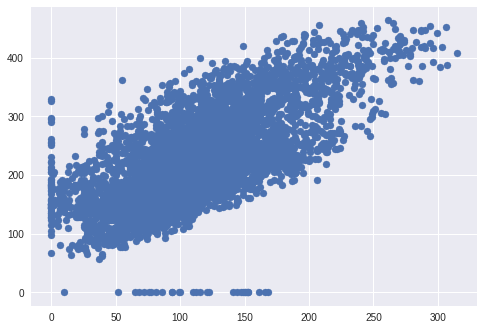

In [9]:
plt.style.use('seaborn')
plt.scatter(TMIN, TMAX) 
#data.plot.scatter(x = 'TMIN', y = 'TMAX')
# To show the plot 
#plt.show()

**PLOTTING THE SMOOTHED SCATTER PLOT WITHOUT SORTING.**

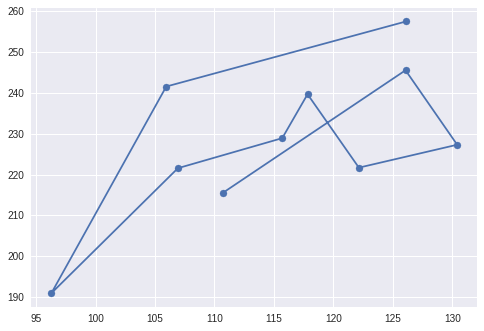

In [10]:
# Slicing the data into deciles.
TMIN_deciles = np.array_split(TMIN, 10)
TMAX_deciles = np.array_split(TMAX, 10)
#print(len(TMIN_deciles))
sm_x = []
sm_y = []
# Computing the central tendencies
for i in range(10):
  sm_x.append(np.mean(TMIN_deciles[i]))
  sm_y.append(np.mean(TMAX_deciles[i]))

#print(sm_x,"\n",sm_y)
plt.style.use('seaborn')
plt.scatter(sm_x, sm_y) 
plt.plot(sm_x,sm_y)
plt.show()


**PLOTTING THE SMOOTHED SCATTER PLOT WITH SORTING.**

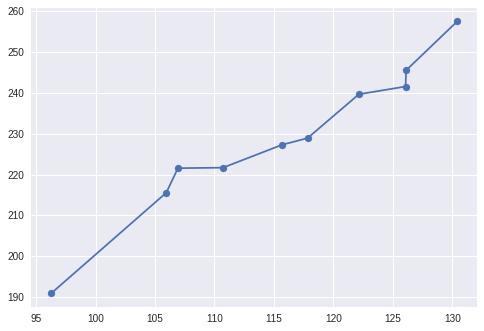

In [11]:
plt.style.use('seaborn')
plt.scatter(np.sort(sm_x), np.sort(sm_y)) 
plt.plot(np.sort(sm_x),np.sort(sm_y))
plt.show()

The above plotted smoothed scatterplot is better readable and providing a good visualization of the linear relationship between TMAX and TMIN.
